# Neural Network Approach

**In this file, we trying to explore the performance of Neural Network. The performance summary is in the end of the file.** 

In [1]:
# Import Libraries
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import time 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import initializers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import warnings

In [2]:
# Set working directories
os.chdir('../data/train_set')
root = os.getcwd()
train_dir = root

In [3]:
# Load the pre-processed Data
train = pd.read_csv('dat_train.csv')
test = pd.read_csv('dat_test.csv')

In [4]:
# Split and transform the Data
X = train.iloc[:, 0:6006]
Y = train.iloc[:, 6006:6007]
Y = tensorflow.keras.utils.to_categorical(Y)
Y= Y[:,1:]
X_test = test.iloc[:, 0:6006]
Y_test = test.iloc[:, 6006:6007]
Y_test = tensorflow.keras.utils.to_categorical(Y_test)
Y_test = Y_test[:,1:]

In [6]:
# Build the Network
warnings.filterwarnings('ignore')
input_shape = [6006]
input_layer = Input(input_shape)
x = BatchNormalization()(input_layer)
x = Dense(22*12,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(22*8,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.2)(x)
x = Dense(22*4,activation='sigmoid',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dense(22*2,activation='tanh',kernel_initializer=initializers.glorot_normal(seed=4))(x)
output_layer = Dense(22,activation='softmax',kernel_initializer=initializers.glorot_normal(seed=4))(x)
model = Model(input_layer,output_layer)

In [7]:
# Training the network and record training time
warnings.filterwarnings('ignore')
start_time = time.time()
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model_his = model.fit(X,Y,epochs=20)
print('training model takes %s seconds' % round ((time.time() - start_time), 3))

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
2000/2000 [==============================] - 3s 1ms/sample - loss: 2.8331 - acc: 0.1625 0s - loss: 2.8887 - acc: 
Epoch 2/20
2000/2000 [==============================] - 2s 794us/sample - loss: 2.2803 - acc: 0.2965
Epoch 3/20
2000/2000 [==============================] - 2s 808us/sample - loss: 1.9669 - acc: 0.3765
Epoch 4/20
2000/2000 [==============================] - 2s 771us/sample - loss: 1.8103 - acc: 0.4020
Epoch 5/20
2000/2000 [==============================] - 2s 770us/sample - loss: 1.6740 - acc: 0.4570
Epoch 6/20
2000/2000 [==============================] - 2s 783us/sample - loss: 1.6031 - acc: 0.4820
Epoch 7/20
2000/2000 [==============================] - 2s 779us/sample - loss: 1.4981 - acc: 0.5015
Epoch 8/20
2000/2000 [==============================] - 2s 757us/sample - loss: 1.4491 - acc: 0.5280
Epoch 9/20
2000/2000 [==============================] - 2s 758us/sample - loss: 1.3621 - acc: 0.5480
Epoch 10/20
2000/20

Text(0.5, 1.0, 'Accuracy Curve')

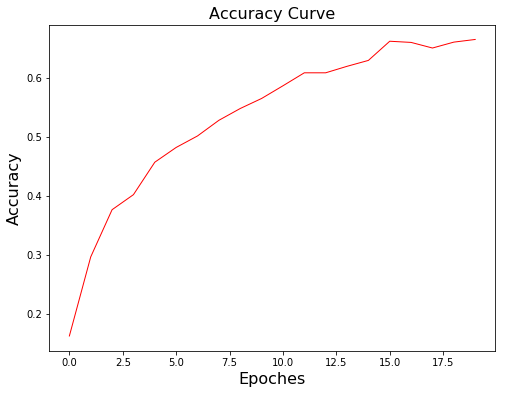

In [8]:
# Plot the training process with accuracy as our metric
check = model_his.history
plt.figure(figsize=[8, 6])
plt.plot(check['acc'], 'r', linewidth = 1.0)
plt.xlabel('Epoches', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Accuracy Curve', fontsize = 16)

In [9]:
# Predict the test set and record the test time
t0 = time.time()
pred = model.predict(X_test)
pred_lst = [] 
for i in range(len(pred)):
    arr = pred[i]
    idx = np.argwhere(arr == np.max(arr))
    pred_lst.append(idx[0][0])
tst_labl = np.argmax(Y_test, axis=-1)
acc = accuracy_score(pred_lst, tst_labl)
print("Test accuracy is %s percent" %(acc*100))
print("testing model takes %s seconds" % round((time.time() - t0),3))

Test accuracy is 56.2 percent
testing model takes 0.274 seconds


**In summary, the Neural Network did a good job. After 20 epoches of training, the training accuracy is 66.5% and the corresponding test accuracy is 56.2%. Speak of the time cost, Neural Network did a excellent job. The training process only takes 35 seconds and the testing process only takes 0.274 seconds. Overall, the Neural Network gives us a good prediction accuracy within a very short time. Since the most concern of this project is time cost, we consider Neural Network as our advanced model.**